In [1]:
from gvm_toolkit import GVMCombination


In [2]:
comb = GVMCombination('input_files/config_lhc.txt')
print('mu_hat =', comb.fit_results['mu'])
print('CI =', comb.confidence_interval())
print('GoF =', comb.goodness_of_fit())


mu_hat = 172.51343427697154
CI = (172.18398115197184, 172.84280927697125, 0.3294140624997084)
GoF = 7.56418926359534


In [3]:
comb.bartlett_correction()

(1.4380166424135754, 14.398244163781655)

In [4]:
comb.syst

{'LHCJES1': array([0.54, 0.33, 0.38, 0.35, 0.28, 0.4 , 0.77, 0.24, 0.69, 0.31, 0.1 ,
        0.16, 0.4 , 0.  , 0.11]),
 'LHCJES2': array([0.3 , 0.3 , 0.2 , 0.41, 0.39, 0.42, 0.54, 0.02, 0.35, 0.17, 0.12,
        0.19, 0.21, 0.  , 0.13]),
 'LHCJES3': array([0.43, 0.07, 0.24, 0.08, 0.05, 0.12, 0.06, 0.01, 0.08, 0.03, 0.01,
        0.02, 0.05, 0.  , 0.01]),
 'LHCbJES': array([0.68, 0.06, 0.62, 0.3 , 0.03, 0.34, 0.7 , 0.61, 0.49, 0.37, 0.32,
        0.29, 0.38, 0.  , 0.  ]),
 'LHCgJES': array([0.03, 0.28, 0.1 , 0.02, 0.21, 0.05, 0.  , 0.  , 0.  , 0.07, 0.08,
        0.02, 0.  , 0.  , 0.  ]),
 'LHClJES': array([0.02, 0.24, 0.02, 0.01, 0.1 , 0.06, 0.  , 0.  , 0.  , 0.04, 0.06,
        0.01, 0.07, 0.  , 0.  ]),
 'CMSJES': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.11, 0.58, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]),
 'JER': array([0.19, 0.22, 0.01, 0.09, 0.2 , 0.1 , 0.14, 0.23, 0.15, 0.  , 0.03,
        0.02, 0.05, 0.  , 0.05]),
 'leptons': array([0.13, 0.04, 0.  , 0.14, 0.16, 0.01

In [5]:
info = comb.input_data()
comb.update_data(info)


In [8]:
info['epsilon']['LHCbJES'] = 0.6
comb.update_data(info)
comb.fit_results['mu']

172.5722175688261

In [6]:
info['stat_error']

{'a': 0.54,
 'b': 0.75,
 'c': 1.35,
 'd': 0.41,
 'e': 0.39,
 'f': 0.55,
 'g': 0.43,
 'h': 0.43,
 'i': 0.69,
 'j': 0.18,
 'k': 0.16,
 'l': 0.25,
 'm': 0.77,
 'n': 3.0,
 'o': 0.2}

In [9]:
info['stat_corr'][('a', 'b')] = 0.1


In [ ]:
info['systematics']['JER']

In [ ]:
info['systematics']['JER']['a']

In [ ]:
info['syst_corr']['JER'][('a', 'b')]

In [7]:
info['epsilon']

{'LHCJES1': 0.0,
 'LHCJES2': 0.0,
 'LHCJES3': 0.0,
 'LHCbJES': 0.6,
 'LHCgJES': 0.0,
 'LHClJES': 0.0,
 'CMSJES': 0.0,
 'JER': 0.0,
 'leptons': 0.0,
 'btag': 0.0,
 'ptmiss': 0.0,
 'pileup': 0.0,
 'trigger': 0.0,
 'ME': 0.0,
 'LHCrad': 0.0,
 'LHChad': 0.0,
 'CMSbHad': 0.0,
 'CR': 0.0,
 'UE': 0.0,
 'PDF': 0.0,
 'topPT': 0.0,
 'bkgData': 0.0,
 'bkgMC': 0.0,
 'method': 0.0,
 'other': 0.0}

In [ ]:
comb.corr['JER'][:2, :2]

In [ ]:
info['stat_error']['a'] += 0.1
info['stat_corr'][('a','b')] = 0.1
info['stat_corr'][('b','a')] = 0.1
info['systematics']['JER']['a'] += 0.05
info['syst_corr']['JER'][('a','b')] = 0.3
info['syst_corr']['JER'][('b','a')] = 0.3
info['epsilon']['JER'] = 0.1
comb.update_inputs(info)
comb.fit_results['mu']

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from gvm_toolkit import GVMCombination

comb = GVMCombination('input_files/config_lhc.txt')
systematics = ['LHCbJES', 'btag', 'ME', 'LHCJES1', 'LHCJES2', 'method', 'CMSbHad', 'LHCrad']
eps_grid = np.linspace(0., 0.6, 7)

base_mu = comb.fit_results['mu']
base_ci = comb.confidence_interval()[2]

cv = {s: [] for s in systematics}
ci = {s: [] for s in systematics}

for syst in systematics:
    info = comb.input_data()
    for k in info['epsilon']:
        info['epsilon'][k] = 0.0
    for eps in eps_grid:
        info['epsilon'][syst] = eps
        comb.update_data(info)
        cv[syst].append(comb.fit_results['mu'])
        ci[syst].append(comb.confidence_interval()[2])

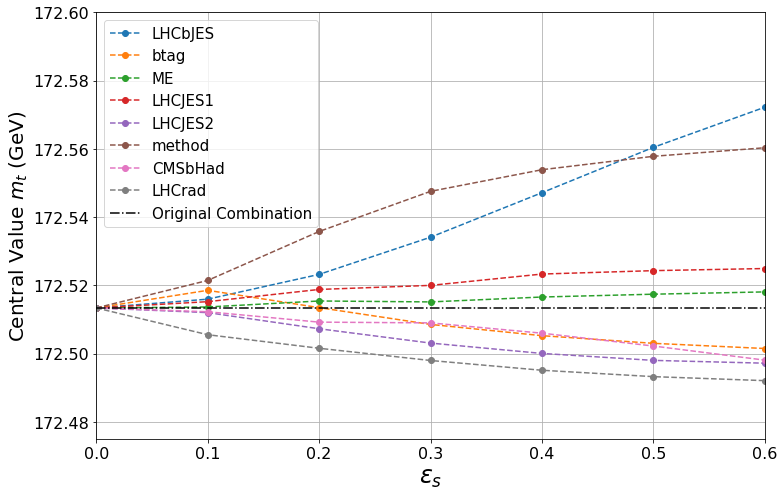

In [19]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, cv[s], '--o', label=s)
plt.axhline(base_mu, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('Central Value $m_t$ (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(172.475, 172.6)
plt.legend(fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()


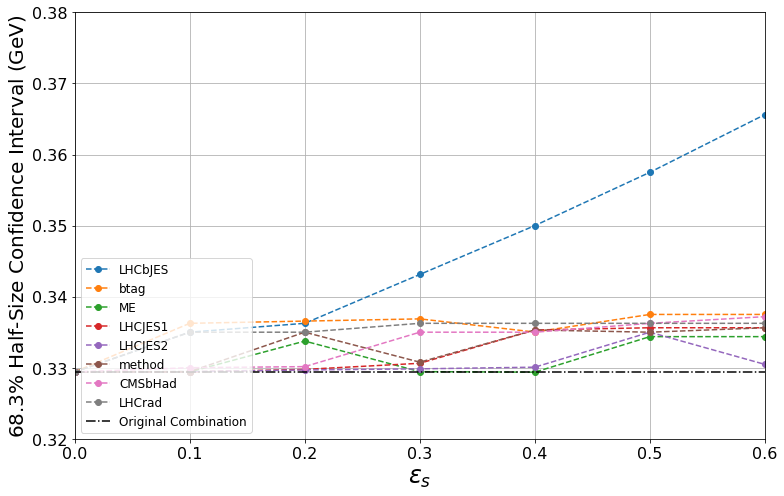

In [23]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, ci[s], '--o', label=s)
plt.axhline(base_ci, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('$68.3\%$ Half-Size Confidence Interval (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(0.32, 0.38)
plt.legend(fontsize=12, loc='lower left')
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()

In [17]:
ci

{'LHCbJES': [(172.18390947896637, 172.8427376039658, 0.3294140624997084),
  (172.17624455933935, 172.84624455933874, 0.3349999999996953),
  (172.18351270380367, 172.85601270380306, 0.3362499999996942),
  (172.1847278458145, 172.8709778458139, 0.34312499999970214),
  (172.18840637359477, 172.88840637359414, 0.3499999999996817),
  (172.19169593498583, 172.90669593498518, 0.35749999999967486),
  (172.19284256882642, 172.92409256882578, 0.3656249999996817)],
 'btag': [(172.18390947896637, 172.8427376039658, 0.3294140624997084),
  (172.17883997873628, 172.85133997873567, 0.3362499999996942),
  (172.17376222051047, 172.84688722050987, 0.336562499999701),
  (172.16914979366754, 172.84289979366696, 0.3368749999997078),
  (172.17018952565996, 172.84022858815933, 0.3350195312496851),
  (172.16329973438002, 172.8382997343794, 0.33749999999969305),
  (172.16209226229378, 172.83709226229317, 0.33749999999969305)],
 'ME': [(172.18390947896637, 172.8427376039658, 0.3294140624997084),
  (172.184186989

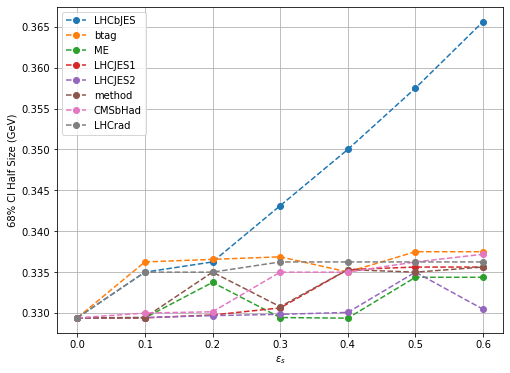

In [6]:
plt.figure(figsize=(8,6))
for s in systematics:
    half = [c[2] for c in ci[s]]
    plt.plot(eps_grid, half, '--o', label=s)
plt.xlabel(r'$\epsilon_s$')
plt.ylabel('68% CI Half Size (GeV)')
plt.legend()
plt.grid(True)


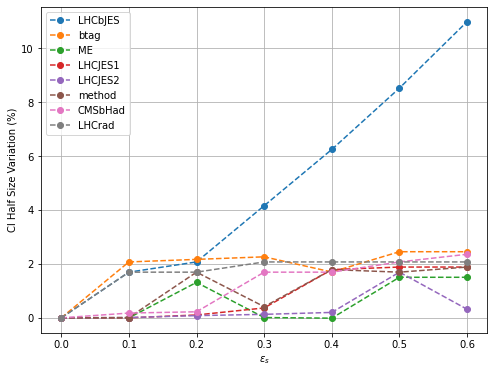

In [7]:
plt.figure(figsize=(8,6))
for s in systematics:
    half = np.array([c[2] for c in ci[s]])
    rel = (half - half[0]) / half[0] * 100
    plt.plot(eps_grid, rel, '--o', label=s)
plt.xlabel(r'$\epsilon_s$')
plt.ylabel('CI Half Size Variation (%)')
plt.legend()
plt.grid(True)
